<a href="https://colab.research.google.com/github/jcpalaciosb/Clasificacion_de_Precios/blob/main/Mobile_Price_Classification_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO 2

## Datos Personales

* **Nombre Completo**: Juan Carlos Palacios Banchero
* **ID Coding Dojo**: 81390
* **Track**: Machine Learning
* **Nombre del proyecto**: Mobile Price Classification
* **Parte Nro.**: 3


In [1]:
# montaje de librerias 
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# PARTE 1

Escoger el conjunto de datos de primera opción, y un conjunto de datos de reserva en caso de que el primero propuesto no se apruebe.  

Proponer dos conjuntos de datos que tengan cada uno un componente de aprendizaje supervisado. Pueden elegir un problema de regresión o clasificación para cada conjunto de datos propuesto.  

Crear un cuaderno de Colab donde hayan subido y mostrado el .head() de cada uno de los conjuntos de datos.  Para cada uno de los conjuntos de datos propuestos, respondan las siguientes preguntas:

1) Fuente de datos

2) Breve descripción de datos

3) ¿Cuál es el objetivo?

4) ¿Este es un problema de clasificación o regresión?

5) ¿Cuántas características hay?

6) ¿Cuántas filas de datos hay?

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

## Solucion a Parte 1: 

1) Fuente de datos: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

**Contexto:**

Bob ha comenzado su propia empresa de telefonía móvil. 
Quiere dar una pelea dura a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de telefonía móvil no se puede simplemente asumir cosas. Para resolver este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las funciones de un teléfono móvil (p. ej., RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Así que necesita tu ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio

2) Breve descripcion de datos: 

* Este conjunto de datos contiene información sobre muchos móviles y variables al respecto.

 * Descripcion de los datos:

| Name          | Description                                                        |
|---------------|--------------------------------------------------------------------|
| battery_power | Total energy a battery can store   in one time measured in mAh     |
| blue          | Has bluetooth or not                                               |
| clock_speed   | speed at which microprocessor   executes instructionS              |
| dual_sim      | Has dual sim support or not                                        |
| fc            | Front Camera mega pixels                                           |
| four_g        | Has 4G or not                                                      |
| int_memory    | Internal Memory in Gigabytes                                       |
| m_dep         | Mobile Depth in cm                                                 |
| mobile_wt     | Weight of mobile phone                                             |
| n_cores       | Number of cores of processor                                       |
| pc            | Primary Camera mega pixels                                         |
| px_height     | Pixel Resolution Height                                            |
| px_width      | Pixel Resolution Width                                             |
| ram           | Random Access Memory in   Megabytes                                |
| sc_h          | Screen Height of mobile in cm                                      |
| sc_w          | Screen Width of mobile in cm                                       |
| talk_time     | longest time that a single   battery charge will last when you are |
| three_g       | Has 3G or not                                                      |
| touch_screen  | Has touch screen or not                                            |
| wifi          | Has wifi or not                                                    |
| price_range   | Price Range                                                        |

In [2]:
# carga de datos train
filename="/content/train.csv"  # se lee solo la data del archivo train a que el test es solo para predecir los valores luego de aplicar el modelo
df = pd.read_csv(filename)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


3) Cual es el objetivo: 
* Utilizar la data arriba detallada para evaluar diferentes modelos de aprendizaje supervisado para elegir el mas adecuado que permita predecir un rango de precios que indica qué tan alto es el precio

4) ¿Este es un problema de clasificación o regresión? 

In [3]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

* Por las caracteristicas de la data del vector objetivo, tenemos un problema de clasificacion

5) ¿Cuántas características hay?

In [4]:
print(f"La cantidad de caracteristicas es: {len(df.keys())}") 
print(f"Las caracteristicas a trabajar son: {df.columns}")

La cantidad de caracteristicas es: 21
Las caracteristicas a trabajar son: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


6) ¿Cuántas filas de datos hay?

In [5]:
filas=df.shape[0]
print(f"Hay un total de {filas} filas")

Hay un total de 2000 filas


7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [6]:
# revision de duplicados:

In [7]:
df.columns.duplicated()   # revision en columnas

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [8]:
df.duplicated().sum()   # revision en filas

0

In [9]:
# revision de datos faltantes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

La data no presenta duplicados ni en columnas ni en filas y tampoco tiene datos faltantes. Habra que analizar la data innecesaria, la correlacion de las variables, determinacion de la variable objetivo y la normalizacion de los valores en su mayoria numerico. El reto prinicpal en esta etapa sera evaluar y seleccionar la data que mejor pueda ayudar a obtener una buena prediccion.

## PARTE 2

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  


Para cumplir con los requisitos para esta semana, deben haber:

 - eliminado las columnas innecesarias

 - eliminado las filas duplicadas

 - identificado y abordado los valores faltantes 

 - identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)
 
 - producido visuales univariantes para el objetivo y todas las características

 - identificado los valores atípicos

 - producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

 - comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.

Comprometan su archivo al repositorio Github y envíen el enlace abajo.

## Solucion a Parte 2: 

**Observacion**:

De lo resuelto en la parte 1, se tiene que no es necesario eliminar filas duplicadas dado que no existen y no se han encontrado valores faltantes, tampoco se presenta en la data valores categoricos que puedan tener alguna inconsistencia: sin embargo, se revisaran los valores unicos de cada columna numerica.

**a) Identificar los valores atípicos**

In [11]:
# Revision de los valores unicos de cada Categoria
caracteristicas=df.columns
for n in range(0, len(caracteristicas)):
  caracteristica=caracteristicas[n]
  unicos = df[caracteristica].unique()
  conteo = df[caracteristica].value_counts()
  print(f"Carateristica: {caracteristica}\n")
  print(f"Valores unicos: \n{unicos}\n")
#  print(f"Conteo de valores: \n{conteo}\n")

Carateristica: battery_power

Valores unicos: 
[ 842 1021  563 ... 1139 1467  858]

Carateristica: blue

Valores unicos: 
[0 1]

Carateristica: clock_speed

Valores unicos: 
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Carateristica: dual_sim

Valores unicos: 
[0 1]

Carateristica: fc

Valores unicos: 
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Carateristica: four_g

Valores unicos: 
[0 1]

Carateristica: int_memory

Valores unicos: 
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Carateristica: m_dep

Valores unicos: 
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Carateristica: mobile_wt

Valores unicos: 
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 1

In [12]:
df["sc_w"].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [13]:
# revision de la data estadistica de cada variable
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
# carga de librerias adicionales a pandas para hacer visualizaciones
import seaborn as sns # visualizacion
import seaborn as sb # visualization
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
from matplotlib import cm
from matplotlib import colors


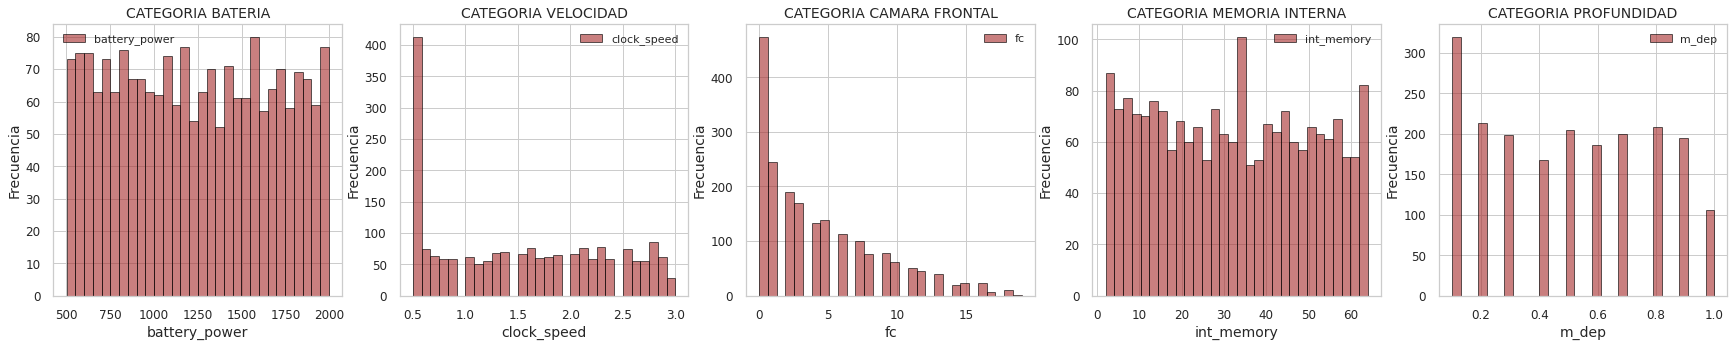

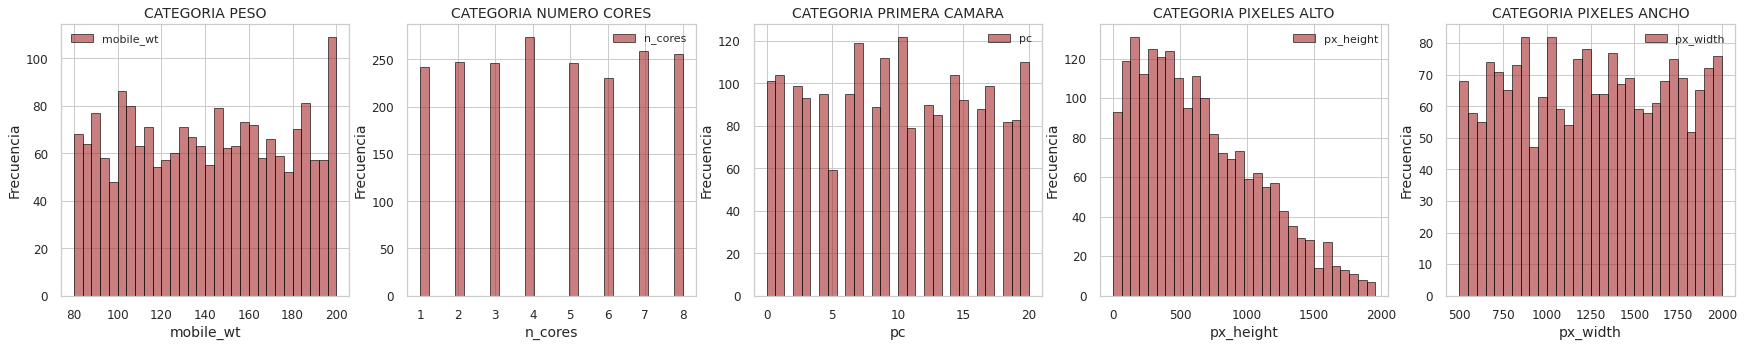

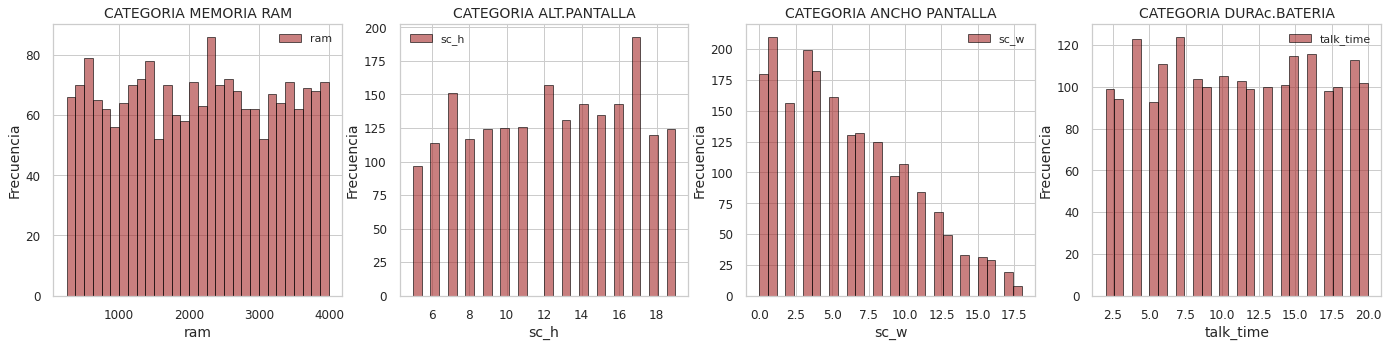

In [92]:
# Revision de la frecuencia de datos de las variables con gran cantidad de valores
lista=np.array(["battery_power",	"clock_speed", "fc",	"int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width","ram", "sc_h", "sc_w", "talk_time"])  # columnas a usar
Titulos=np.array(["BATERIA", "VELOCIDAD", "CAMARA FRONTAL", "MEMORIA INTERNA", "PROFUNDIDAD", "PESO", "NUMERO CORES", "PRIMERA CAMARA", 
                  "PIXELES ALTO", "PIXELES ANCHO", "MEMORIA RAM", "ALT.PANTALLA", "ANCHO PANTALLA", "DURAc.BATERIA"])  # columnas a usar para titulo
plt.style.use('seaborn')
sub=1
fig = plt.figure(figsize=(30, 5))
for x in range(0, len(lista)):
  if sub > 5:
     plt.show()
     sub = 1
     fig = plt.figure(figsize=(30, 5))
  sns.set_theme(style="whitegrid")
  plt.subplot(1, 5, sub)
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial
  variable="CATEGORIA "+Titulos[x]
  plt.title(variable, fontsize = 14)
  plt.xlabel(lista[x], fontsize = 14)     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia", fontsize = 14) # agrega sub-titulo al eje y
  plt.xticks(fontsize = 12, rotation = 0)
  plt.yticks(fontsize = 12)
  df.loc[:, lista[x]].hist(bins = 30, legend=" ", color = "brown", edgecolor='black', alpha=0.6)
  sub=sub+1

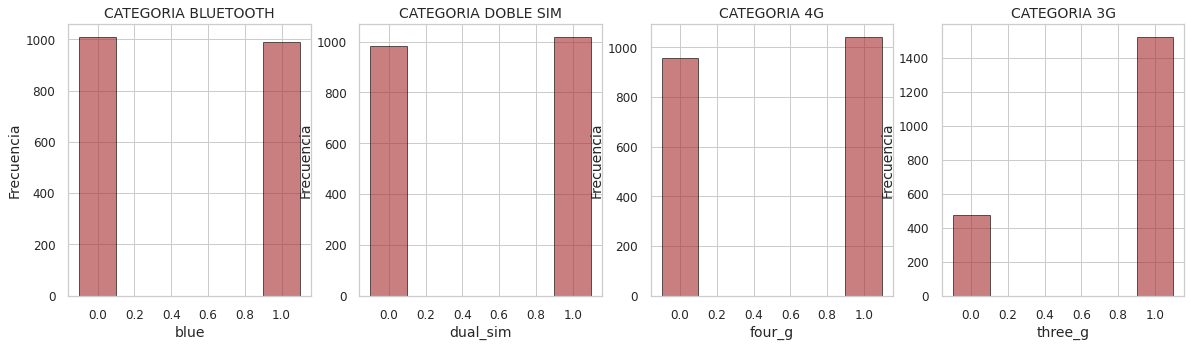

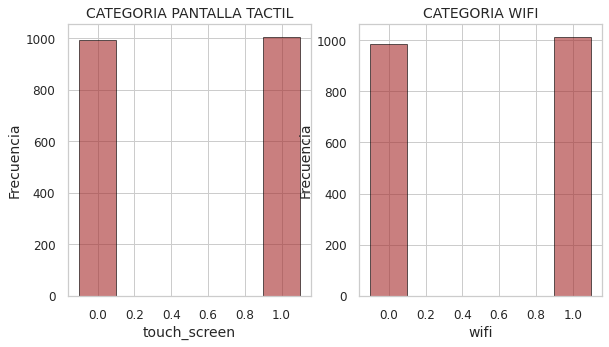

In [93]:
# Revision del las variables de pocos valores unicos
lista=np.array(["blue",	"dual_sim", "four_g",	"three_g", "touch_screen", "wifi"])  # columnas a usar
Titulos=np.array(["BLUETOOTH", "DOBLE SIM", "4G", "3G",	"PANTALLA TACTIL", "WIFI"])  # columnas a usar para titulo
plt.style.use('seaborn')
sub=1
fig = plt.figure(figsize=(20, 5))
for x in range(0, len(lista)):
  if sub > 4:
     plt.show()
     sub = 1
     fig = plt.figure(figsize=(20, 5))
  sns.set_theme(style="whitegrid")
  plt.subplot(1, 4, sub)
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial
  variable="CATEGORIA "+Titulos[x]
  plt.title(variable, fontsize = 14)
  plt.xlabel(lista[x], fontsize = 14)     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia", fontsize = 14) # agrega sub-titulo al eje y
  plt.xticks(fontsize = 12, rotation = 0)
  plt.yticks(fontsize = 12)
  dftemp=df.loc[:, lista[x]].value_counts()
  plt.bar(dftemp.index, dftemp.values, label=" ", color ='brown', edgecolor='black', alpha=0.6, width=0.2)
  sub=sub+1

**Observacion:**

De la revision de los datos unicos de cada caracteristica, su informacion estadistica, el histograma de cada variable de varios datos unicos y diagrama de barras de variables de pocos datos unicos, vemos que no hay valores atipicos ni inconsistencias. Se evidencias en los diagramas de barras variables numericas con valores binarios evidenciando un tiene o no tiene determinada caracteristica.

**b) producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

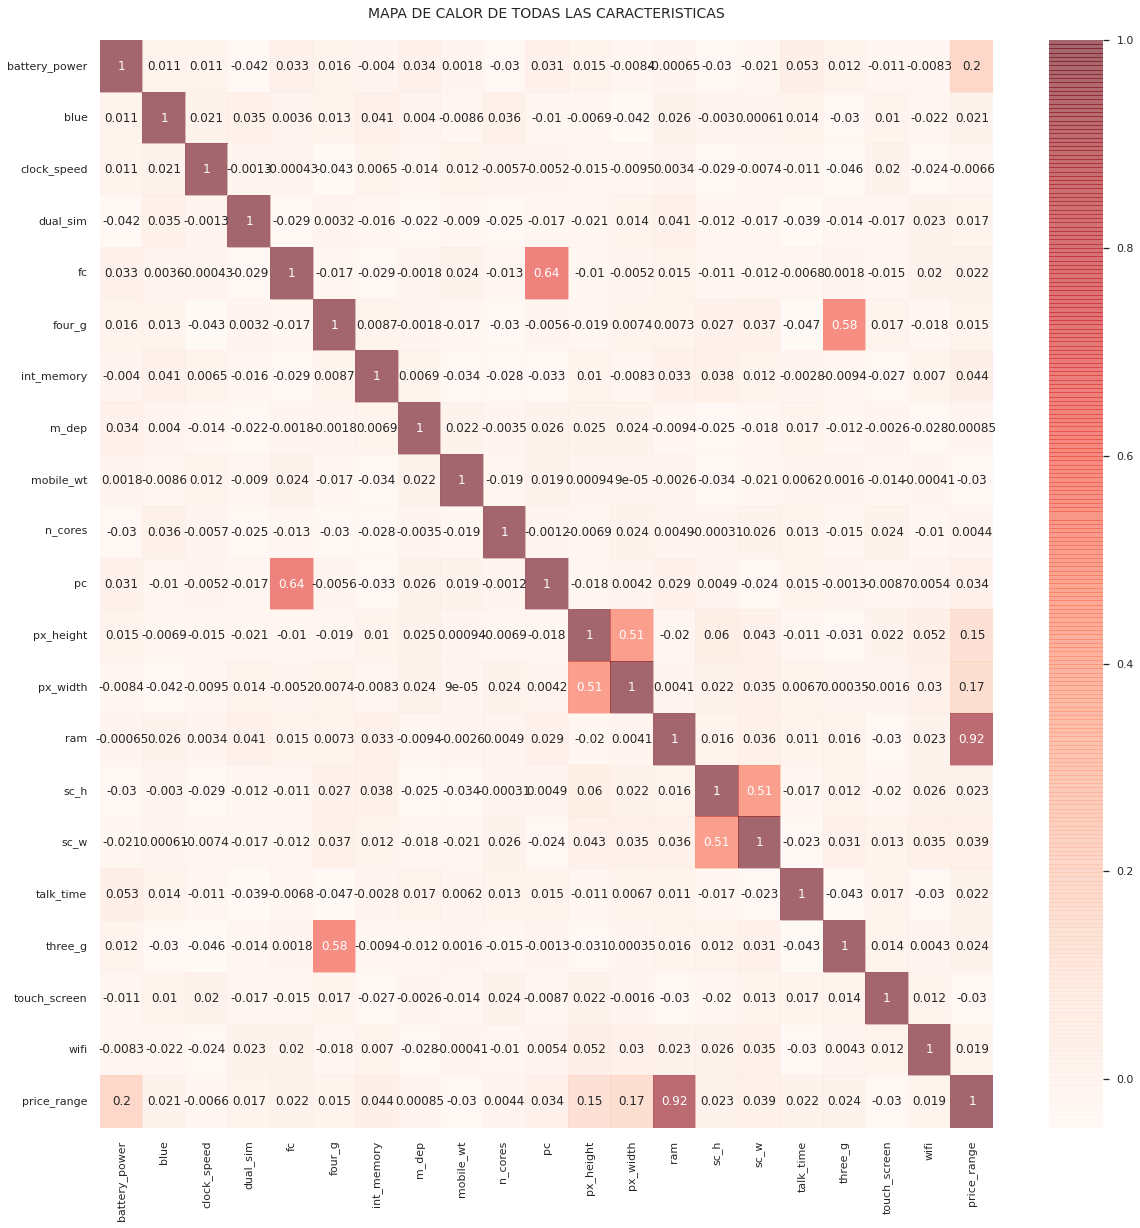

In [58]:
# Mapa de calor de la correlacion de las caracteristicas
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.set_theme(style="whitegrid")
plt.title("MAPA DE CALOR DE TODAS LAS CARACTERISTICAS"+"\n", fontsize = 14)
sns.heatmap(corr, cmap = 'Reds', annot = True, alpha=0.6)

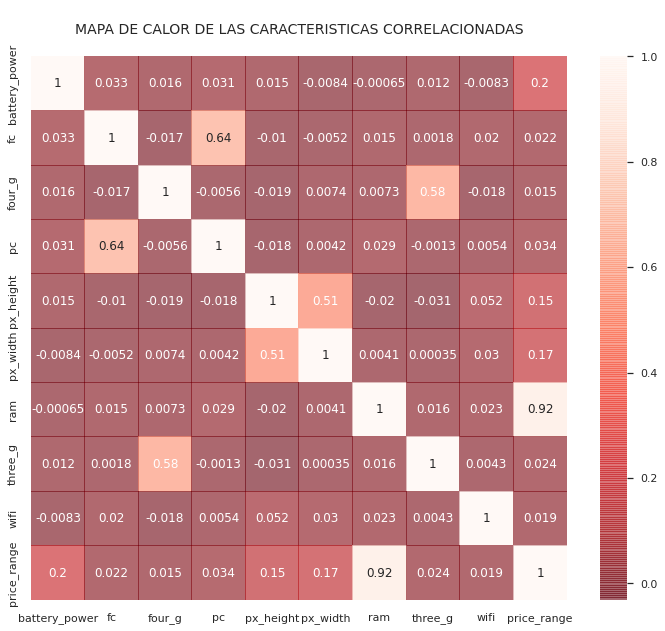

In [94]:
# Mapa de calor de la correlacion de las caracteristicas reducido a relevantes
df.drop(columns=["blue", "clock_speed", "dual_sim", "int_memory", "m_dep", "mobile_wt", "n_cores", "sc_h", "sc_w", "talk_time", "touch_screen"], axis=1, inplace=True)
corr = df.corr()
sns.set(rc = {'figure.figsize':(12,10)})
sns.set_theme(style="whitegrid")
plt.title("\nMAPA DE CALOR DE LAS CARACTERISTICAS CORRELACIONADAS"+"\n", fontsize = 14)
sns.heatmap(corr, cmap = 'Reds_r', annot = True, alpha=0.6)

**Observacion**:

Del mapa de calor observamos lo siguiente:

 - Existe una correlacion alta entre las variables Camara Frontal y Primera Camara (fc y pc) con 0.64, 4G y 3G (four_g y three_g) con 0.58 y Altura de Pantalla y Ancho de Pantalla (sc_h y sc_w) con 0.51.
 - Existe una correlacion muy alta entre la variable de Memoria RAM (ram) y el vector objetivo Rango de Precios (price_range) con 0.92, lo cual parece indicar que la cantidad de memoria ram tiene mucha incidencia en el rango de precios.
 - Existe una correlacion baja entre las variables Bateria (battery_power) con el Rango de Precios (price_range) de 0.2 y de Altura de Pixeles (px_height) y Ancho de Pixeles  (px_width) con Rango de Precios (price_range) de 0.15 y 0.17. Se estan considerando en el analisis estas ultimas caracteristicas, por estar relacionadas con el vector objetivo a pesar de la baja correlacion

Mediante los siguientes codigos, se visualizara la concentracion de los datos de las categorias que tienen correlacion muy alta y baja con el vector objetivo y por otro lado, se visualizaran la concentracion de los datos las variables fc, pc, four_g, three_g, sc_h y sc_w respecto a la correlacion muy alta de la variable ram con el vector objetivo, para analizar si se incluyen en el conjunto de datos con los que se trabajaran los modelos.



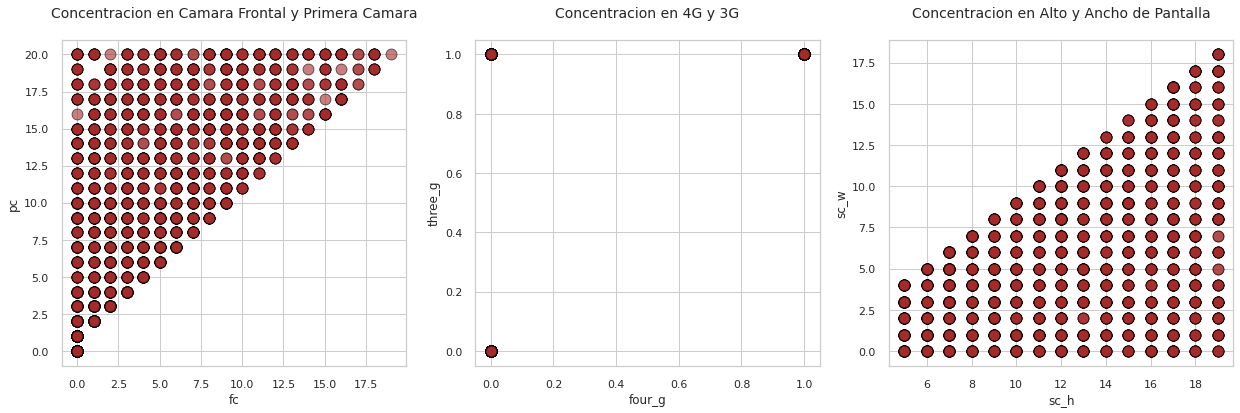

In [79]:
# Correlaciones altas entre las caracteristicas
plt.figure(figsize=(21,6))
# Subplot 1
plt.subplot(1, 3, 1);
plt.title('Concentracion en Camara Frontal y Primera Camara\n', fontsize = 14);
sns.scatterplot(data=df, x='fc', y='pc', color="brown", s=120, alpha=0.6, edgecolor="black");  
# Subplot 2
plt.subplot(1, 3, 2);
plt.title('Concentracion en 4G y 3G\n', fontsize = 14);
sns.scatterplot(data=df, x='four_g', y='three_g', color="brown", s=120, alpha=0.6, edgecolor="black");
# Subplot 
plt.subplot(1, 3, 3);
plt.title('Concentracion en Alto y Ancho de Pantalla\n', fontsize = 14);
sns.scatterplot(data=df, x='sc_h', y='sc_w', color="brown", s=120, alpha=0.6, edgecolor="black");
plt.show()

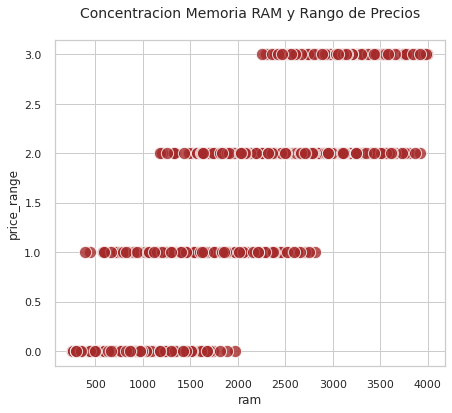

In [81]:
# Concentracion muy alta entre la caracteristica ram y vector objetivo price_range
plt.figure(figsize=(7,6))
plt.title('Concentracion Memoria RAM y Rango de Precios\n', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', color="brown", s=150, alpha=0.8, edgecolor="white");
plt.show()

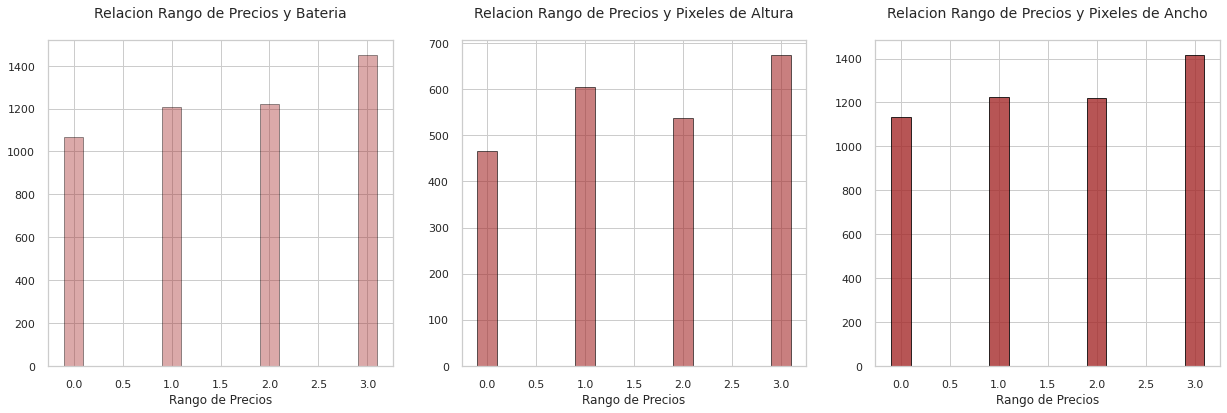

In [65]:
# Visualizacion de las caracteristicas correlacionadas de manera baja con el vector objetivo 
rango=list(range(4))
battery=df.groupby("price_range")["battery_power"].median()
pxheight=df.groupby("price_range")["px_height"].median()
pxwidth=df.groupby("price_range")["px_width"].median()
fig, axes = plt.subplots(1,3, figsize = (21, 6))
# Subplot 1
axes[0].bar(rango, battery, color='brown', edgecolor='black', alpha=0.4, width=0.2)
axes[0].set_title(f'Relacion Rango de Precios y Bateria\n', fontsize=14)
axes[0].set_xlabel('Rango de Precios')  
# Subplot 2
axes[1].bar(rango, pxheight, color='brown', edgecolor='black', alpha=0.6, width=0.2)
axes[1].set_title(f'Relacion Rango de Precios y Pixeles de Altura\n', fontsize=14)
axes[1].set_xlabel('Rango de Precios')  
# Subplot 
axes[2].bar(rango, pxwidth, color='brown', edgecolor='black', alpha=0.8, width=0.2)
axes[2].set_title(f'Relacion Rango de Precios y Pixeles de Ancho\n', fontsize=14)
axes[2].set_xlabel('Rango de Precios')  
plt.show()

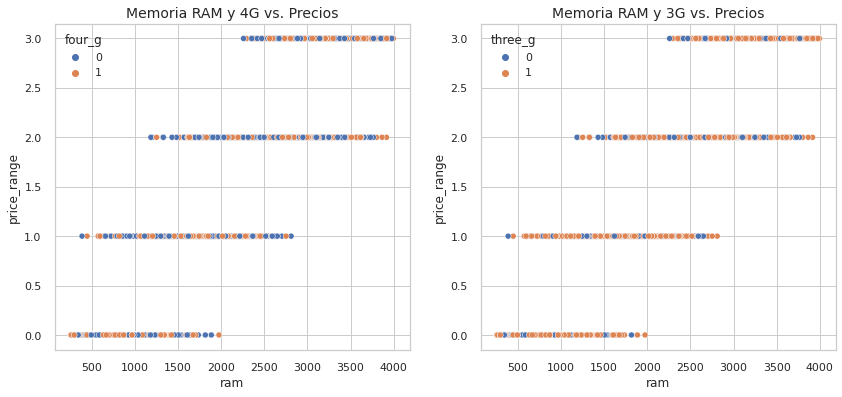

In [83]:
# Memoria RAM, 4G y 3G vs. Precios
plt.figure(figsize=(14,6))
# Subplot 1
plt.subplot(1, 2, 1);
plt.title('Memoria RAM y 4G vs. Precios', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', hue="four_g");
# Subplot 2
plt.subplot(1, 2, 2);
plt.title('Memoria RAM y 3G vs. Precios', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', hue="three_g");
plt.show()

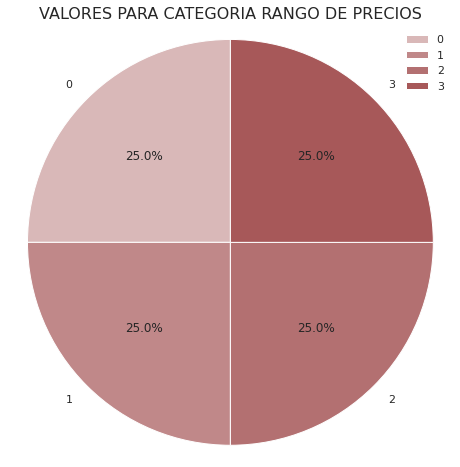

In [91]:
# visualizacion del Reparto de Valores de price_range
valor = df['price_range'].unique()
valor_s=sorted(valor)
cantidades = df['price_range'].value_counts()
colores = ["#D9B8B8", "#C08889", "#B37071", "#A75859"]
explode = (0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.title('VALORES PARA CATEGORIA RANGO DE PRECIOS', fontsize = 16);
ax1.pie(cantidades, explode=explode, labels=valor_s, autopct='%1.1f%%', shadow=False, startangle=90, colors = colores)
ax1.axis('equal') 
plt.legend(valor_s)
plt.show()

**Observacion**:

Los graficos muestran la concentracion de la data en los rangos de precios correspondientes a los valores de Memoria Ram. Se han visualizado todas las caracteristicas que guardan una correlacion y dado su existencia, se trabajara con todas esas caracteristicas, eliminando todas aquella que no han presentado correlacion alguna.

Por otro lado, revisados los valores del vector objetivo y sus cantidades, se encuentra que esta perfectamente balanceado para determinar cada uno de los rangos de precios

**c) Eliminacion de las columnas innecesarias**

* De analisis, evaluacion y visualizacion de los datos mostrados, se considera conveniente trabajar unicamente con las caracteirsticas que han mostrado tener correlacion: es decir las siguientes:

 - Bateria (battery_power)
 - Camara Frontal (cf)
 - 4G (four_g)
 - Primera Camara (pc)
 - Altura de Pixeles (px_height)
 - Anchio de Pixeles (px_width)
 - Memoria RAM (ram)
 - Altura de Pantalla (sc_h) 
 - Ancho de Pantalla (sc_w) 
 - 3G (three_g)
 - **Rango de Precios (price_range)** (vector objetivo)

 * Las caracteristicas a eliminar son: 'blue', 'clock_speed', 'dual_sim', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'talk_time', 'touch_screen', 'wifi'



# Referencias

* [Kraggle](https://www.kaggle.com/)
* [Curso Regression Models](https://github.com/fralfaro/CodingDojo-DataScience/blob/main/docs/6-RegressionModels/6-RegressionModels.ipynb)
* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Pandas](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/2-Pandas.ipynb%20-%20Colaboratory.pdf)
* [Visualizaciones](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/Visualizacion.pdf)
* [Matploib](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/Matplotlib%20-%20Home.pdf)
* [Plataforma Coding Dojo]()